In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

# Output: Number of predicted wins (W)

# its a regression problem

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
#to check the nuber of rows and columns
print('the number of rows and columns of the dataset are :',df.shape)

the number of rows and columns of the dataset are : (30, 17)


# the dataset contains of integer type and only earned run average contains float type data

In [5]:
#to find out nan values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

there are no nan values present in the data

In [6]:
#checking dtpyes once again
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# EDA AND VISUALIZATION

In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

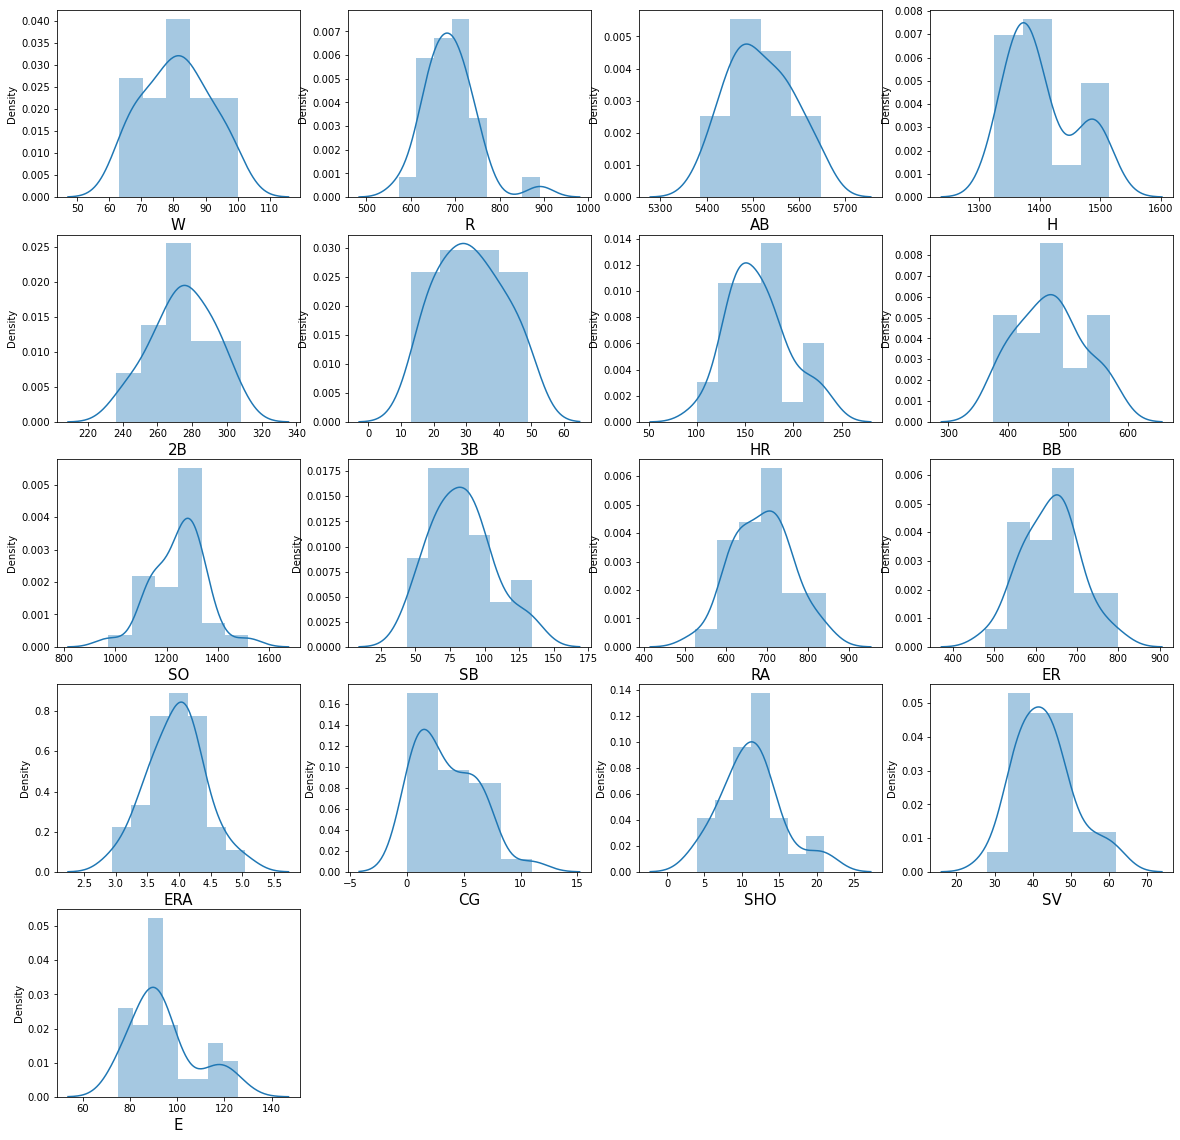

In [8]:
#checking the skewness in the dataset
plt.figure(figsize=(20,20))
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# there is some skewness present in the data as we can see from the above distplots

# there is no variable which is normally distributed

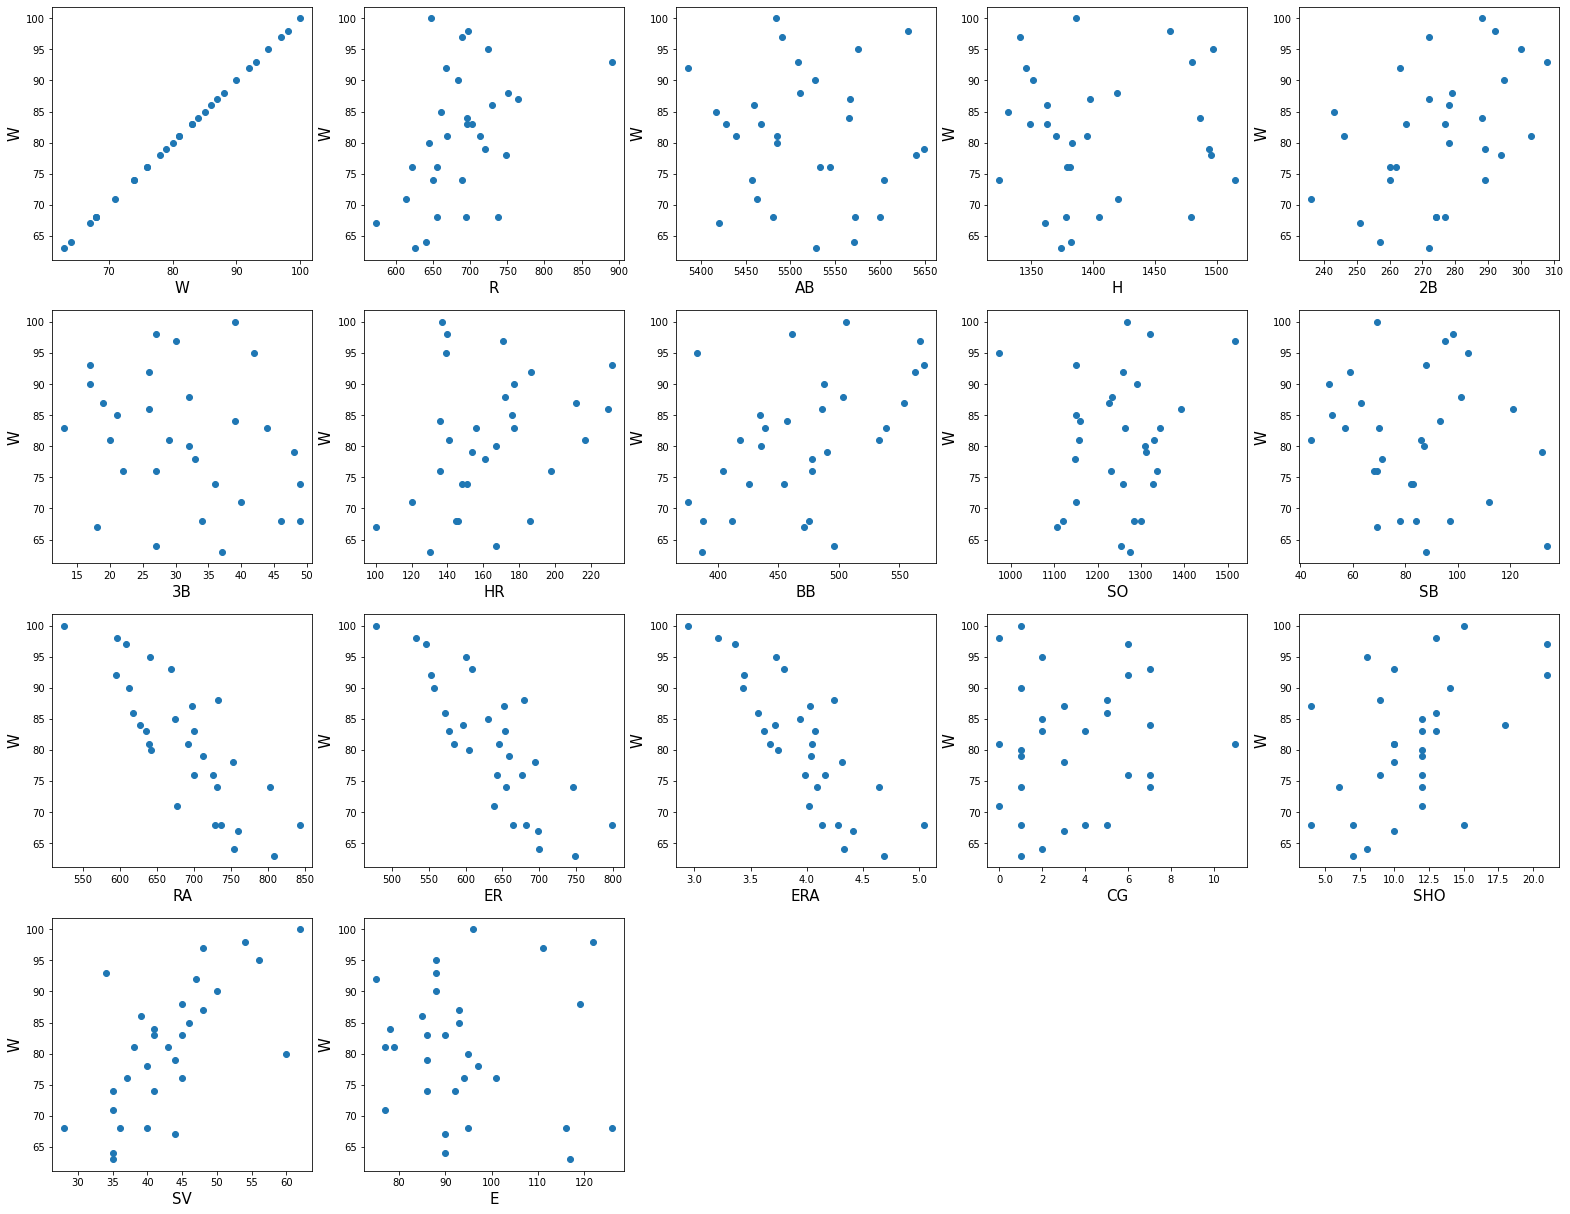

In [9]:
#plot scatterplot to check the correlation of the dependent variables with the independent variable
plt.figure(figsize=(27,27))
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df[i],df['W'])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('W',fontsize=15)
    plotnumber+=1
plt.show()

# what we can conclude from the above analysis is that columns like SO,SB,CG,AB,3B HAVE  very less correlation with the output - W

# these are unnecessary columns which have very weak correlation with the output

# rest all columns shown negative as well as positive correlation with the output

In [10]:
#to check the correlation using statistical analysis
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

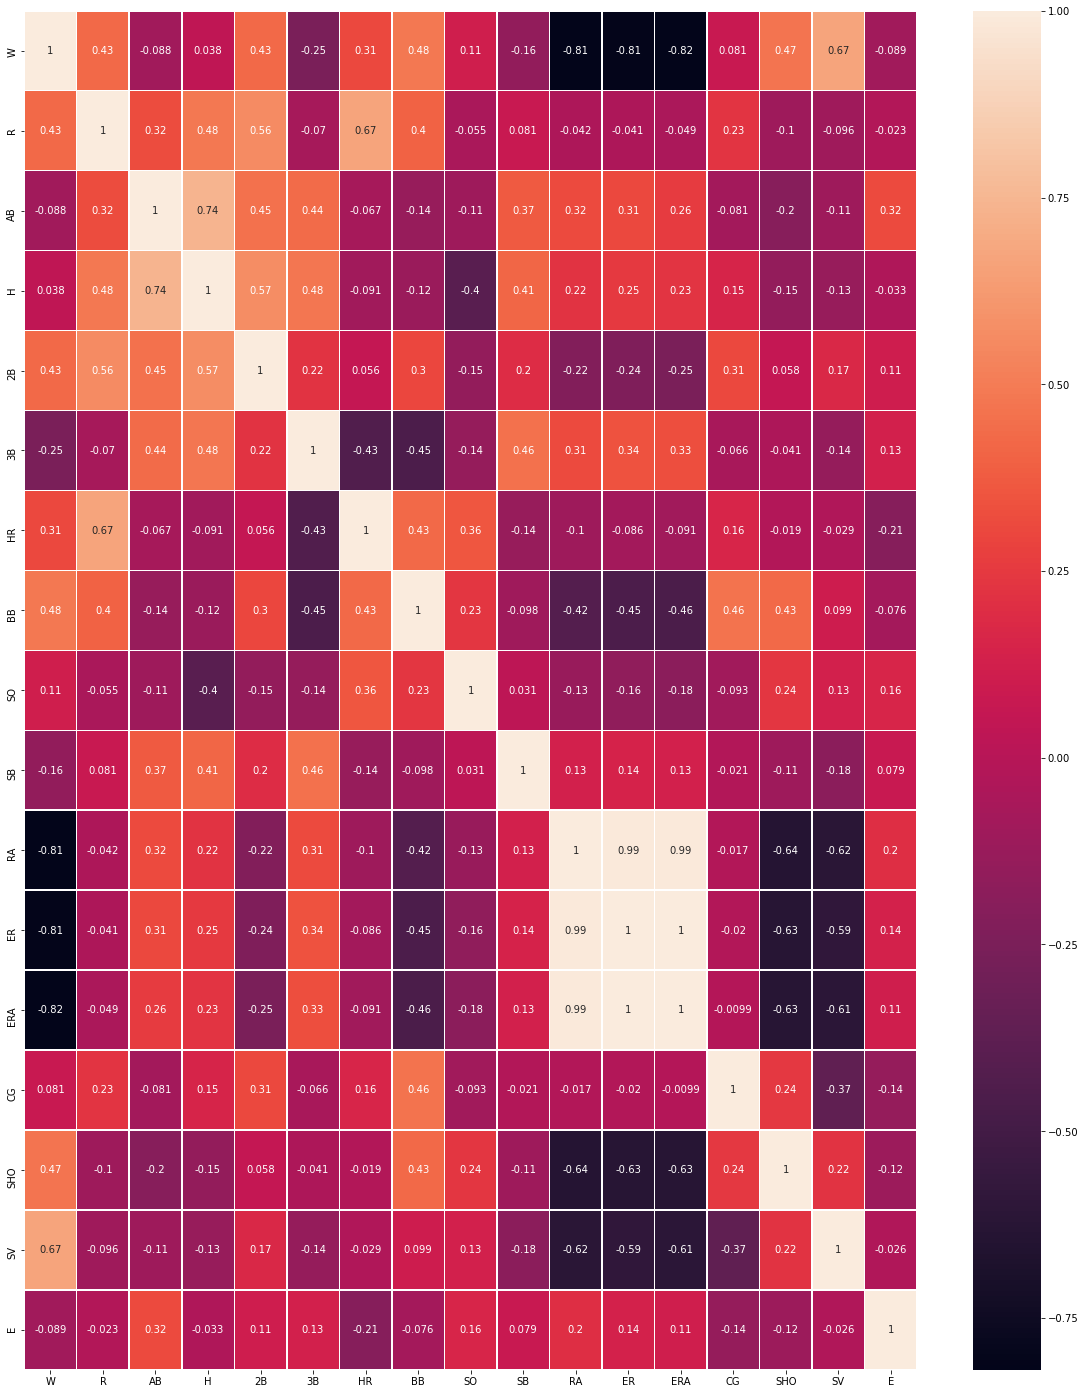

In [11]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),linewidth=0.5,annot=True)

# from this heatmap we can see that columns like E,CG,H,AB have the least correaltion

# and from the scatterplots we found that SO and SB have less correlation too

# we decide to drop these columns as they dont show much correlation after checking the heatmap as well as the scatterplots with the output variable - W

In [12]:
#droping the less correlated columns
df=df.drop(['E','CG','H','AB','SO','SB'],axis=1)
df

,W,R,2B,3B,HR,BB,RA,ER,ERA,SHO,SV
0,95,724,300,42,139,383,641,601,3.73,8,56
1,83,696,277,44,156,439,700,653,4.07,12,45
2,81,669,303,29,141,533,640,584,3.67,10,38
3,76,622,260,27,136,404,701,643,3.98,9,37
4,74,689,289,49,151,455,803,746,4.64,12,35
5,93,891,308,17,232,570,670,609,3.80,10,34
6,87,764,272,19,212,554,698,652,4.03,4,48
7,81,713,246,20,217,418,693,646,4.05,10,43
8,80,644,278,32,167,436,642,604,3.74,12,60
9,78,748,294,33,161,478,753,694,4.31,10,40


In [13]:
df.shape

(30, 11)

W         AxesSubplot(0.125,0.536818;0.110714x0.343182)
R      AxesSubplot(0.257857,0.536818;0.110714x0.343182)
2B     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
3B     AxesSubplot(0.523571,0.536818;0.110714x0.343182)
HR     AxesSubplot(0.656429,0.536818;0.110714x0.343182)
BB     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
RA           AxesSubplot(0.125,0.125;0.110714x0.343182)
ER        AxesSubplot(0.257857,0.125;0.110714x0.343182)
ERA       AxesSubplot(0.390714,0.125;0.110714x0.343182)
SHO       AxesSubplot(0.523571,0.125;0.110714x0.343182)
SV        AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

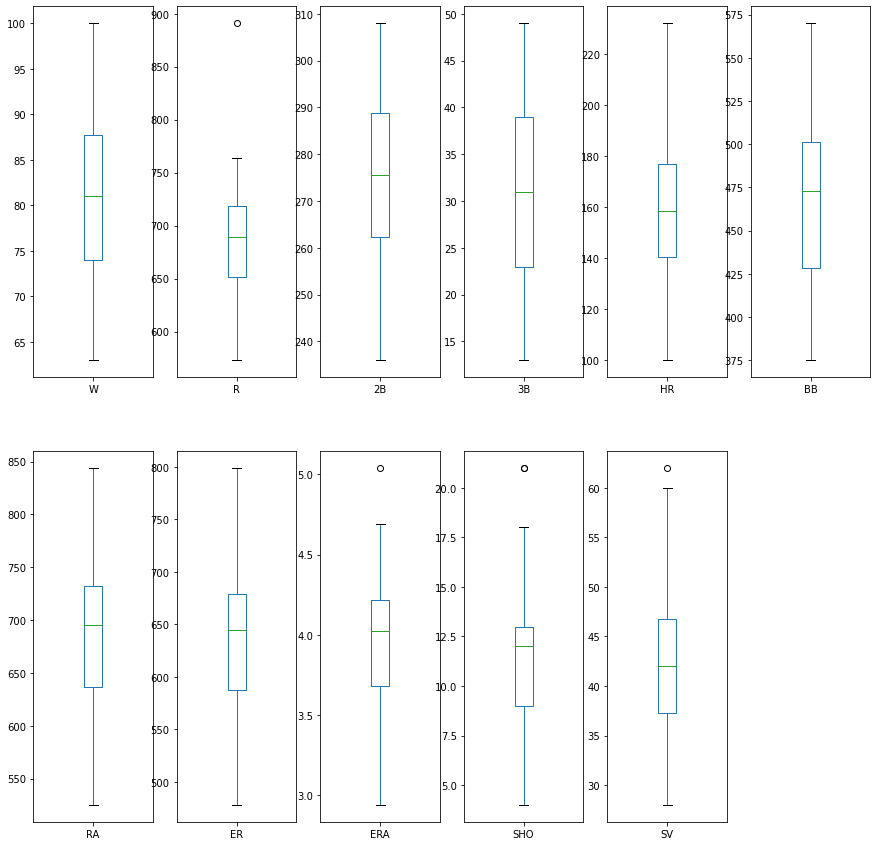

In [14]:
#to check if there are any outliers present in the data using boxplot for all columns
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(15,15))

# we can see there are some outliers present 

# SHO,ERA,SV and R columns contains outliers

# removing the outliers

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [16]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [17]:
df1=df[(z<3).all(axis=1)]

In [18]:
df1

,W,R,2B,3B,HR,BB,RA,ER,ERA,SHO,SV
0,95,724,300,42,139,383,641,601,3.73,8,56
1,83,696,277,44,156,439,700,653,4.07,12,45
2,81,669,303,29,141,533,640,584,3.67,10,38
3,76,622,260,27,136,404,701,643,3.98,9,37
4,74,689,289,49,151,455,803,746,4.64,12,35
6,87,764,272,19,212,554,698,652,4.03,4,48
7,81,713,246,20,217,418,693,646,4.05,10,43
8,80,644,278,32,167,436,642,604,3.74,12,60
9,78,748,294,33,161,478,753,694,4.31,10,40
10,88,751,279,32,172,503,733,680,4.24,9,45


In [19]:
df1.shape

(29, 11)

# we have removed the outliers and we can proceed further

In [20]:
x=df1.drop(['W'],axis=1)
y=df1['W']

In [21]:
x.shape

(29, 10)

In [22]:
y.shape

(29,)

In [23]:
x.columns

Index(['R', '2B', '3B', 'HR', 'BB', 'RA', 'ER', 'ERA', 'SHO', 'SV'], dtype='object')

# removing the skewness

In [24]:
from sklearn.preprocessing import power_transform
x.head()

,R,2B,3B,HR,BB,RA,ER,ERA,SHO,SV
0,724,300,42,139,383,641,601,3.73,8,56
1,696,277,44,156,439,700,653,4.07,12,45
2,669,303,29,141,533,640,584,3.67,10,38
3,622,260,27,136,404,701,643,3.98,9,37
4,689,289,49,151,455,803,746,4.64,12,35


In [25]:
x.columns

Index(['R', '2B', '3B', 'HR', 'BB', 'RA', 'ER', 'ERA', 'SHO', 'SV'], dtype='object')

In [26]:
#to remove the skewness
x[['R', '2B', '3B', 'HR', 'BB', 'ERA', 'SHO', 'SV','ER','RA']]=power_transform(x[['R', '2B', '3B', 'HR', 'BB', 'ERA', 'SHO', 'SV','ER','RA']],method='yeo-johnson')

In [27]:
x

,R,2B,3B,HR,BB,RA,ER,ERA,SHO,SV
0,0.962544,1.685188,1.006150,-0.741927,-1.605198,-0.660979,-0.508052,-0.509292,-0.787002,1.532753
1,0.298863,0.138198,1.185227,-0.109958,-0.462096,0.160226,0.235800,0.241440,0.236737,0.312020
2,-0.312105,1.907385,-0.228819,-0.664354,1.232098,-0.674967,-0.752214,-0.642098,-0.252844,-0.664137
3,-1.308298,-0.837665,-0.432228,-0.860039,-1.162721,0.174077,0.093091,0.043013,-0.513555,-0.820689
4,0.137737,0.911435,1.622636,-0.289647,-0.155686,1.575971,1.555853,1.493491,0.236737,-1.149165
6,1.964209,-0.163010,-1.295827,1.631637,1.579494,0.132517,0.221537,0.153276,-2.064039,0.677176
7,0.698146,-1.542635,-1.182758,1.767734,-0.877217,0.063208,0.135920,0.197363,-0.252844,0.052325
8,-0.852595,0.199897,0.068703,0.269125,-0.520476,-0.646992,-0.465016,-0.487168,0.236737,1.908137
9,1.555951,1.255256,0.166017,0.065014,0.270944,0.891396,0.819308,0.769577,-0.252844,-0.365006
10,1.631727,0.262086,0.068703,0.434620,0.717576,0.616173,0.620346,0.615685,-0.513555,0.312020


# now we have removed the skewness with power transform now we will scale the data

# feature scaling

In [28]:
#scaling the data using standard scaler
sc=StandardScaler()
x[['R', '2B', '3B', 'HR', 'BB', 'ERA', 'SHO', 'SV','ER','RA']]=sc.fit_transform(x[['R', '2B', '3B', 'HR', 'BB', 'ERA', 'SHO', 'SV','ER','RA']])
x

,R,2B,3B,HR,BB,RA,ER,ERA,SHO,SV
0,0.962544,1.685188,1.006150,-0.741927,-1.605198,-0.660979,-0.508052,-0.509292,-0.787002,1.532753
1,0.298863,0.138198,1.185227,-0.109958,-0.462096,0.160226,0.235800,0.241440,0.236737,0.312020
2,-0.312105,1.907385,-0.228819,-0.664354,1.232098,-0.674967,-0.752214,-0.642098,-0.252844,-0.664137
3,-1.308298,-0.837665,-0.432228,-0.860039,-1.162721,0.174077,0.093091,0.043013,-0.513555,-0.820689
4,0.137737,0.911435,1.622636,-0.289647,-0.155686,1.575971,1.555853,1.493491,0.236737,-1.149165
6,1.964209,-0.163010,-1.295827,1.631637,1.579494,0.132517,0.221537,0.153276,-2.064039,0.677176
7,0.698146,-1.542635,-1.182758,1.767734,-0.877217,0.063208,0.135920,0.197363,-0.252844,0.052325
8,-0.852595,0.199897,0.068703,0.269125,-0.520476,-0.646992,-0.465016,-0.487168,0.236737,1.908137
9,1.555951,1.255256,0.166017,0.065014,0.270944,0.891396,0.819308,0.769577,-0.252844,-0.365006
10,1.631727,0.262086,0.068703,0.434620,0.717576,0.616173,0.620346,0.615685,-0.513555,0.312020


# we have scaled the data

# checking multicollinearity 

In [29]:
#vif method ro check multicollinearity
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,3.131205,R
1,2.360234,2B
2,2.330537,3B
3,2.944187,HR
4,2.256211,BB
5,93.478531,RA
6,451.065680,ER
7,271.322242,ERA
8,2.630081,SHO
9,2.390973,SV


we have to drop ER as it is the highest 

In [30]:
x=x.drop(['ER'],axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,3.129120,R
1,2.323187,2B
2,2.218085,3B
3,2.644054,HR
4,2.230775,BB
5,46.235633,RA
6,47.742520,ERA
7,2.513654,SHO
8,1.929172,SV


we have to drop ERA as it is the highest and ERA is the earned average of RA

In [31]:
x=x.drop(['ERA'],axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,3.088706,R
1,2.208245,2B
2,2.188375,3B
3,2.624700,HR
4,2.049284,BB
5,3.431860,RA
6,2.511842,SHO
7,1.929098,SV


# now it all seems good

# as we have already reduced columns after checking the multicollinearity and correaltion no need to do pca

# we can move forward with model building

# Regression model building

In [32]:
#making a list of the regression models which are to be tested with the data set
models=[GradientBoostingRegressor(),LinearRegression(),Ridge(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [34]:
#making a for loop to check the models and their mean cross_val score with scoring set to r2
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 82,test_size=0.20)
    score=cross_val_score(i,x_train,y_train,cv=5,scoring='r2').mean()
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print(i)
    print('mean cross_val_score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('\n')

GradientBoostingRegressor()
mean cross_val_score 0.3296592651348025
r2 0.464763868838748
diff 0.1351046037039455


LinearRegression()
mean cross_val_score 0.44604527255203336
r2 0.8822365127453129
diff 0.43619124019327954


Ridge()
mean cross_val_score 0.7014004234521579
r2 0.9162941147507223
diff 0.2148936912985644


BayesianRidge()
mean cross_val_score 0.7174618252048033
r2 0.918870527309738
diff 0.20140870210493467


SGDRegressor()
mean cross_val_score 0.6229565991933702
r2 0.9127675680787063
diff 0.2898109688853361


SVR()
mean cross_val_score -0.6553398521094407
r2 0.09928052005121135
diff 0.754620372160652


AdaBoostRegressor()
mean cross_val_score 0.13836160262568198
r2 0.6336905989133212
diff 0.49532899628763927


KNeighborsRegressor()
mean cross_val_score 0.17814425294201586
r2 0.6478845423471322
diff 0.46974028940511636


RandomForestRegressor()
mean cross_val_score 0.32873293996897707
r2 0.6325969616407143
diff 0.30386402167173726


BaggingRegressor()
mean cross_val_score 0.

# we can see  mean cross val score and r2 score of all the tested models

# we saw that that the best performing models with high r2 score of more than 91% and least difference are BayesianRidge and Ridge regressor

# hypertuning the best models

# Ridge regressor

In [207]:
parameters={'alpha':[0.001,0.001,0.1,1],'solver':['auto','lsqr','saga']}
clf=GridSearchCV(Ridge(),parameters,cv=5,scoring='r2')
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'solver': 'auto'}

In [49]:
rd=Ridge(alpha=1,solver='auto')
rd.fit(x,y)
y_pred=rd.predict(x)
score=r2_score(y,y_pred)
print('r2_score :',score)

r2_score : 0.9102175273792973


In [50]:
rd=Ridge(alpha=1,solver='auto')
rd.fit(x_train,y_train)
y_pred=rd.predict(x_test)
score=r2_score(y_test,y_pred)
print('r2_score :',score)

r2_score : 0.9162941147507223


# now we check bayesian Ridge

In [210]:
parameters={'alpha_init':[0.001,0.001,0.1,1],'n_iter':[10,100,200]}
clf=GridSearchCV(BayesianRidge(),parameters,cv=5,scoring='r2')
clf.fit(x,y)
clf.best_params_

{'alpha_init': 0.001, 'n_iter': 100}

In [38]:
br=BayesianRidge(alpha_init=0.001,n_iter=100)
br.fit(x,y)
y_pred=br.predict(x)
score=r2_score(y,y_pred)

print('r2_score :',score)

r2_score : 0.9084670635785072


In [39]:
br=BayesianRidge(alpha_init=0.001,n_iter=100)
br.fit(x_train,y_train)
y_pred=br.predict(x_test)
score=r2_score(y_test,y_pred)
print('r2_score :',score)

r2_score : 0.9188705270132006


In [40]:
#checking the errors
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Error:
Mean Absolute Error: 1.9487955601825675
Mean Squared Error: 5.933719510395631
Root Mean Square Error: 2.4359227225828883


# we can check all the errors

# we will be checking the predicted and the actual data and the difference

In [54]:
y_pred=rd.predict(x)

In [55]:
y_pred

array([92.65837   , 82.3369088 , 80.57780862, 70.99316522, 69.23936721,
       87.86516599, 82.39032852, 87.26570634, 81.79229126, 85.43499019,
       87.51284612, 81.66595201, 76.69551511, 70.97209524, 98.07689233,
       95.24907491, 92.92984061, 71.81614109, 66.73543302, 90.81161039,
       87.38663266, 71.51347477, 69.69034844, 61.6950845 , 90.81692947,
       88.3169274 , 83.59834991, 71.62154655, 67.23581202])

In [56]:
df1['predicted']=y_pred

In [57]:
df1['difference']=df1['W']-df1['predicted']

In [58]:
df1

,W,R,2B,3B,HR,BB,RA,ER,ERA,SHO,SV,predicted,difference
0,95,724,300,42,139,383,641,601,3.73,8,56,92.658370,2.341630
1,83,696,277,44,156,439,700,653,4.07,12,45,82.336909,0.663091
2,81,669,303,29,141,533,640,584,3.67,10,38,80.577809,0.422191
3,76,622,260,27,136,404,701,643,3.98,9,37,70.993165,5.006835
4,74,689,289,49,151,455,803,746,4.64,12,35,69.239367,4.760633
6,87,764,272,19,212,554,698,652,4.03,4,48,87.865166,-0.865166
7,81,713,246,20,217,418,693,646,4.05,10,43,82.390329,-1.390329
8,80,644,278,32,167,436,642,604,3.74,12,60,87.265706,-7.265706
9,78,748,294,33,161,478,753,694,4.31,10,40,81.792291,-3.792291
10,88,751,279,32,172,503,733,680,4.24,9,45,85.434990,2.565010


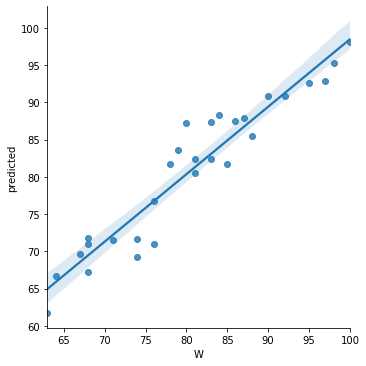

In [59]:
#checking the lm plot of predicted and actual data
sns.lmplot(x='W',y='predicted',data=df1)

<AxesSubplot:xlabel='predicted', ylabel='Density'>

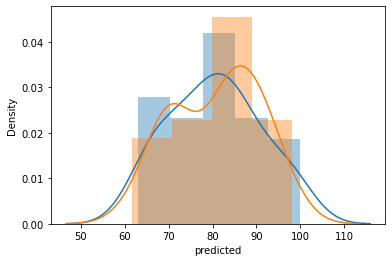

In [60]:
#checking the 
sns.distplot(df1['W'])
sns.distplot(df1['predicted'])

# what we can see from the above analysis is that the predicted and the actual data are very much similar to each other

# therefore we can move forward and save the model RIDGE

In [61]:
#saving the BayesianRidge model
joblib.dump(br,'baseball.obj')

['baseball.obj']